In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import seaborn as sns
sns.set()

/opt/anaconda3/envs/pyfinance/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start = datetime(2017,9,20)
end = date.today()

btc = web.DataReader("BTC-USD", 'yahoo', start, end)
eth = web.DataReader("LINK-USD", 'yahoo', start, end)
eos = web.DataReader("EOS-USD", 'yahoo', start, end)

In [3]:
eth.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-19,0.189448,0.152489,0.156494,0.189165,2718640.0,0.189165
2017-09-20,0.207892,0.155292,0.189132,0.169680,2126270.0,0.169680
2017-09-21,0.181675,0.139869,0.169826,0.150503,1423220.0,0.150503
2017-09-22,0.157440,0.126297,0.149562,0.131129,1186670.0,0.131129
2017-09-23,0.190250,0.130275,0.131110,0.170278,1025740.0,0.170278


## Visualize

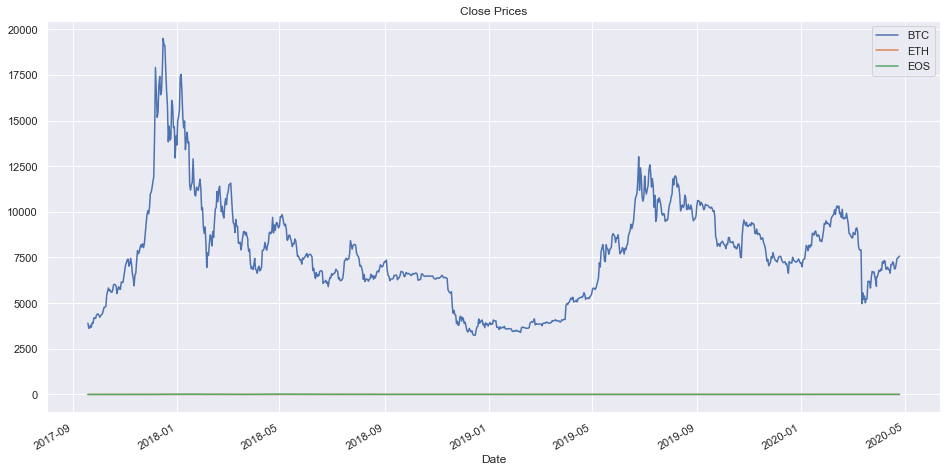

In [4]:
btc['Adj Close'].plot(label='BTC',figsize=(16,8),title='Close Prices')
eth['Adj Close'].plot(label='ETH')
eos['Adj Close'].plot(label='EOS')
plt.legend()

## Correlazione

In [5]:
from pandas.plotting import scatter_matrix

In [6]:
crypto_comp = pd.concat([btc['Adj Close'],eth['Adj Close'],eos['Adj Close']],axis=1)
crypto_comp.columns = ['BTC Close', 'ETH Close', 'EOS Close']

In [7]:
crypto_comp.head()

,BTC Close,ETH Close,EOS Close
Date,,,
2017-09-19,3905.949951,0.189165,0.612827
2017-09-20,3631.040039,0.169680,0.546153
2017-09-21,3630.699951,0.150503,0.569846
2017-09-22,3792.399902,0.131129,0.576697
2017-09-23,3682.840088,0.170278,0.546274


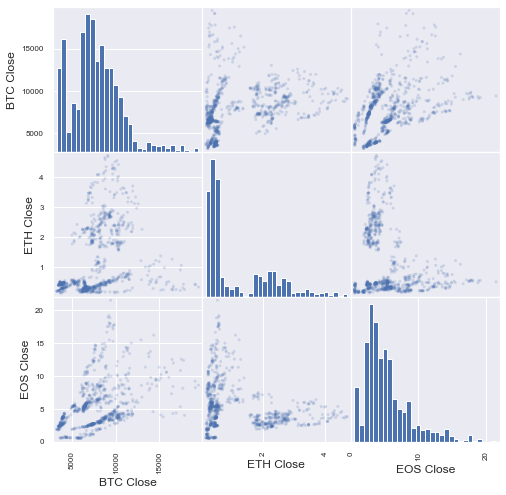

In [8]:
scatter_matrix(crypto_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins': 30});